In [2]:
# Visualizing ABRICATE summary output in R

library(ggplot2)
## Before importing it into R I manually modified genes names so that there wouldn't be any problems. Remeber to set NA string as "."
abricate.ARGs_summary <- read.table("data/abricate.ARGs_summary.txt", 
                                    header = TRUE, 
                                    sep = "\t", 
                                    na.strings = ".")
head(abricate.ARGs_summary)

,FILE,NUM_FOUND,AAC6_Ie_APH2_Ia,ANT4_Ib,ANT6_Ia,APH3_IIIa,Efae_ACT_CHL,Efac_ACT_CHL,ErmA,ErmB,⋯,tetU,vanA,vanHA,vanRA,vanSA,vanXA,vanYA,vanZA,vgaALC,vgaE
,<chr>,<int>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,GCA_000009005.1_ASM900v1_genomic-ARGs.txt,8,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,GCA_000009585.1_ASM958v1_genomic-ARGs.txt,12,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,GCA_000009645.1_ASM964v1_genomic-ARGs.txt,15,NA,100.00,NA,NA,NA,NA,100.00;100.00;100.00;100.00;100.00,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
4,GCA_000009665.1_ASM966v1_genomic-ARGs.txt,17,100.00,100.00,NA,NA,NA,NA,100.00;100.00,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
5,GCA_000010445.1_ASM1044v1_genomic-ARGs.txt,15,NA,100.00,NA,NA,NA,NA,100.00;100.00,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
6,GCA_000010465.1_ASM1046v1_genomic-ARGs.txt,9,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [13]:
# ------------------------------------------------- ARGs
## Filtering my ARGs dataframe to get only genomes, their number of ARGs and b-lactam resistance genes
abricate_blactams <- abricate.ARGs_summary[, c(1, 2, 16, 40, 41)] 
colnames(abricate_blactams) <- c("FILE", "NUM_FOUND", "blaZ", "mecA", "mecC")
View(abricate_blactams)

## Replacing NA with zero
abricate_blactams[is.na(abricate_blactams)] <- 0


FILE,NUM_FOUND,blaZ,mecA,mecC
<chr>,<int>,<dbl>,<dbl>,<dbl>
GCA_000009005.1_ASM900v1,8,NA,NA,NA
GCA_000009585.1_ASM958v1,12,1,1,NA
GCA_000009645.1_ASM964v1,15,1,1,NA
GCA_000009665.1_ASM966v1,17,NA,1,NA
GCA_000010445.1_ASM1044v1,15,NA,1,NA
GCA_000010465.1_ASM1046v1,9,NA,NA,NA
GCA_000011265.1_ASM1126v1,9,NA,1,NA
GCA_000011505.1_ASM1150v1,15,1,1,NA
GCA_000011525.1_ASM1152v1,10,1,NA,NA


In [14]:
## Counting genomes with blaZ and mec genes
blaZ_only_count <- sum(abricate_blactams$blaZ > 0 & abricate_blactams$mecA == 0 & abricate_blactams$mecC == 0)
mec_only_count <- sum((abricate_blactams$mecA > 0 | abricate_blactams$mecC > 0) & abricate_blactams$blaZ == 0)
- sum(abricate_blactams$blaZ > 0)
both_count <- sum(abricate_blactams$blaZ > 0 & (abricate_blactams$mecA > 0 | abricate_blactams$mecC > 0))
MSSA <- sum((abricate_blactams$mecA == 0 & abricate_blactams$mecC == 0) & abricate_blactams$blaZ == 0)

### Print the counts
cat("Genomes with only blaZ but no mec genes:", blaZ_only_count, "\n") # Genomes with only blaZ but no mec genes: 452  
cat("Genomes with only mec genes but no blaZ:", mec_only_count, "\n") # Genomes with only mec genes but no blaZ: 180 
cat("Genomes with both blaZ and mec genes:", both_count, "\n") # Genomes with both blaZ and mec genes: 737 
cat("Genomes without blaZ and mec genes:", MSSA, "\n") # 345

sum(blaZ_only_count, mec_only_count, both_count, MSSA) # 1714

## Defining MRSA group
MRSA <- sum(blaZ_only_count, mec_only_count, both_count) # 1369

[1] -1189

Genomes with only blaZ but no mec genes: 452 
Genomes with only mec genes but no blaZ: 180 
Genomes with both blaZ and mec genes: 737 
Genomes without blaZ and mec genes: 345 


[1] 1714

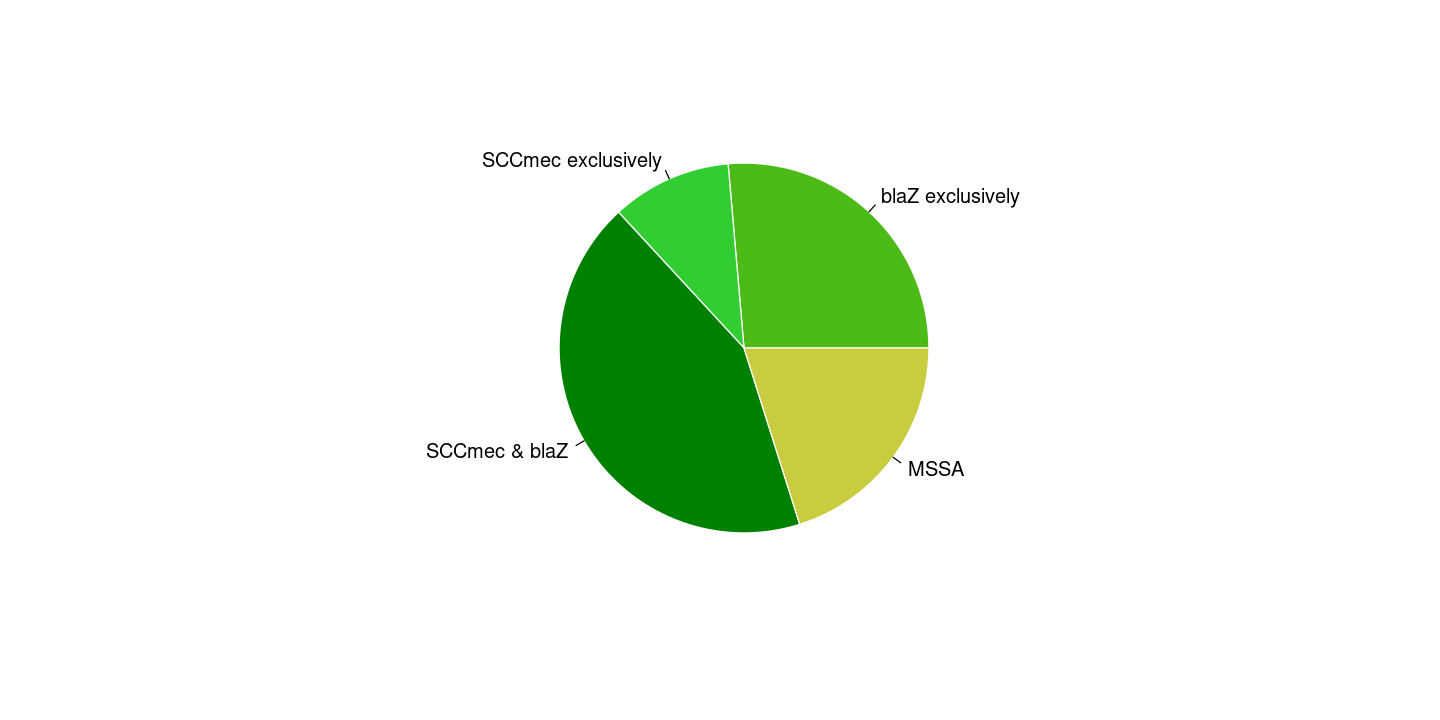

In [15]:
## Plot beta-lactam resistance pie chart 
myPalette <- c("#4CBB17", "#32CD32", "#008000", "#C9CC3F")
blactam_pie <- c(452, 180, 737, 345)
pie(blactam_pie, labels = c("blaZ exclusively","SCCmec exclusively","SCCmec & blaZ","MSSA"), border="white", col=myPalette )

In [16]:
## Adding a new column "Category" based on b-lactam resistance genes presence
abricate_blactams$Category <- ifelse(
  abricate_blactams$blaZ > 0 | abricate_blactams$mecA > 0 | abricate_blactams$mecC > 0,
  "MRSA",
  "MSSA"
)

In [7]:
## Printing the updated dataframe with the new "Category" column
print(abricate_blactams)

write.table(abricate_blactams, "abricate_blactams.tsv", sep = "\t", quote = FALSE, row.names = FALSE, col.names = TRUE) # save it 

                                                                   FILE
1                             GCA_000009005.1_ASM900v1_genomic-ARGs.txt
2                             GCA_000009585.1_ASM958v1_genomic-ARGs.txt
3                             GCA_000009645.1_ASM964v1_genomic-ARGs.txt
4                             GCA_000009665.1_ASM966v1_genomic-ARGs.txt
5                            GCA_000010445.1_ASM1044v1_genomic-ARGs.txt
6                            GCA_000010465.1_ASM1046v1_genomic-ARGs.txt
7                            GCA_000011265.1_ASM1126v1_genomic-ARGs.txt
8                            GCA_000011505.1_ASM1150v1_genomic-ARGs.txt
9                            GCA_000011525.1_ASM1152v1_genomic-ARGs.txt
10                           GCA_000012045.1_ASM1204v1_genomic-ARGs.txt
11                           GCA_000013425.1_ASM1342v1_genomic-ARGs.txt
12                           GCA_000013465.1_ASM1346v1_genomic-ARGs.txt
13                           GCA_000016805.1_ASM1680v1_genomic-A

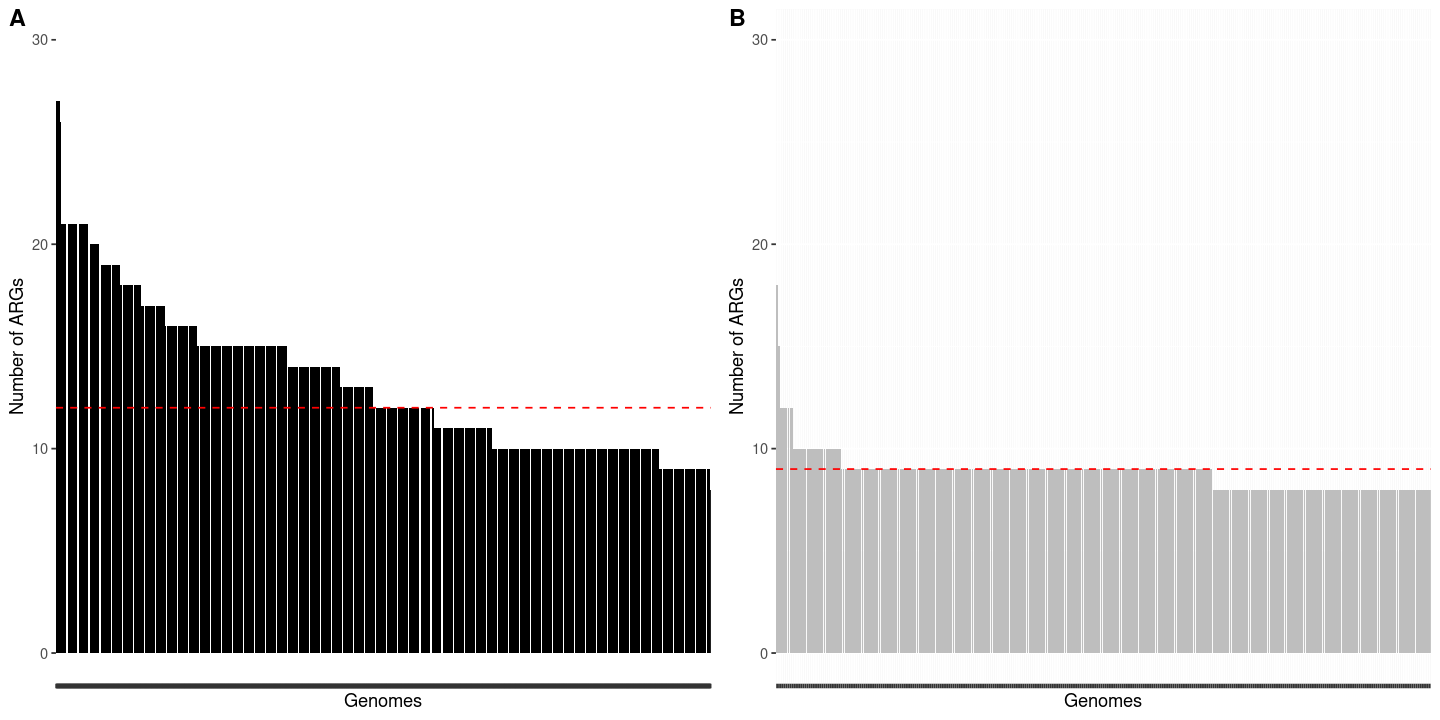

In [17]:
## Creating a barplot with the number of ARGs identified per genome
library(ggplot2)
library(dplyr)
library(ggpubr)

### Filter data for MRSA (Category = "MRSA")
abricate_blactams_mrsa <- abricate_blactams %>%
  filter(Category == "MRSA")

### Create bar plot for MRSA NUM_FOUND with specified y-axis limits
plot_mrsa <- ggplot(abricate_blactams_mrsa, aes(x = reorder(FILE, -NUM_FOUND), y = NUM_FOUND)) +
  geom_bar(stat = "identity", fill = "black") +
  labs(x = "Genomes", y = "Number of ARGs") +
  theme(axis.text.x = element_blank()) +
  ylim(0, 30) + # Set y-axis limits to 0-30
  geom_hline(yintercept = median(abricate_blactams_mrsa$NUM_FOUND), linetype = "dashed", color = "red") 

### Filter data for MSSA (Category = "MSSA")
abricate_blactams_mssa <- abricate_blactams %>%
  filter(Category == "MSSA")

### Create bar plot for MSSA NUM_FOUND with the same y-axis limits
plot_mssa <- ggplot(abricate_blactams_mssa, aes(x = reorder(FILE, -NUM_FOUND), y = NUM_FOUND)) +
  geom_bar(stat = "identity", fill = "gray") +
  labs(x = "Genomes", y = "Number of ARGs") +
  theme(axis.text.x = element_blank()) +
  ylim(0, 30) + # Set y-axis limits to 0-30
  geom_hline(yintercept = median(abricate_blactams_mssa$NUM_FOUND), linetype = "dashed", color = "red")

options(repr.plot.width = 12, repr.plot.height = 6)

### Combine plots using ggpubr
ggarrange(plot_mrsa, plot_mssa, labels = c("A", "B"), ncol = 2, nrow = 1, common.legend = TRUE, align = "hv")

In [18]:
## Processing ARGs summary output from abricate before plotting it 
### Loop through all columns except the first two (FILE and NUM_FOUND), so that I replace the coverage values by the number of times that ARGs was found in that specific genome (basically creating a count matrix)
for (col in names(abricate.ARGs_summary)[-c(1, 2)]) {
    # Replace ";" with "" (empty string) and calculate the difference in string lengths
    count_semicolons <- nchar(abricate.ARGs_summary[[col]]) - nchar(gsub(";", "", abricate.ARGs_summary[[col]])) + 1
   
    # Replace the original values with the count of semicolons
    abricate.ARGs_summary[[col]] <- count_semicolons
}

### Remove '_genomic.abricate.txt' from the first column
abricate.ARGs_summary$FILE <- gsub("_genomic-ARGs.txt", "", abricate.ARGs_summary$FILE)

### Checking if any ARG hasn't had any hit in the selected genomes
all_na_columns <- which(colSums(is.na(abricate.ARGs_summary)) == nrow(abricate.ARGs_summary))

### Print the names of columns with all NA values
if (length(all_na_columns) > 0) {
    cat("Columns with all NA values:", names(abricate.ARGs_summary)[all_na_columns], "\n")
} else {
    cat("No columns with all NA values found.\n")
} # No columns with all NA values found.

### Mannually checked the highest value to scale my colors accordingly --> 6

library(pheatmap)

### Remove the first column (FILE) as it's not needed for the heatmap
heatmap_abricate_df <- abricate.ARGs_summary[, -1]

### Replace NA with 0 in the entire dataframe
heatmap_abricate_df[is.na(heatmap_abricate_df)] <- 0

### Remove the first column (NUM_FOUND)
heatmap_abricate_df <- heatmap_abricate_df[, -1]

### Create a custom color palette from 0 to 6
color_palette <- colorRampPalette(c("white", "#013208"))(7)  

No columns with all NA values found.


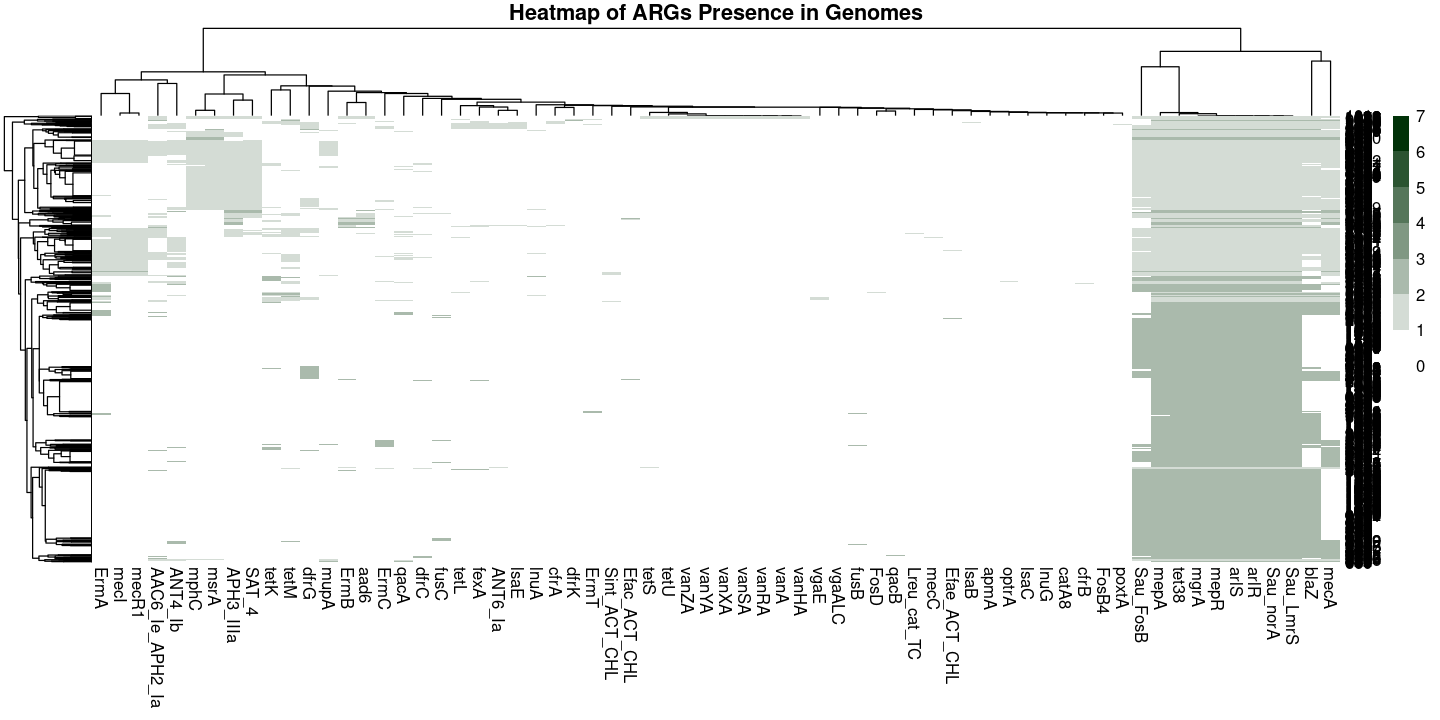

In [19]:
## Create the heatmap
pheatmap(
  heatmap_abricate_df,
  cluster_rows = TRUE,
  cluster_cols = TRUE,
  color = color_palette,
  scale = "row",
  border_color = "grey",
  main = "Heatmap of ARGs Presence in Genomes",
  breaks = seq(0, 7, by = 1)  # Specify the breaks from 0 to 6
)

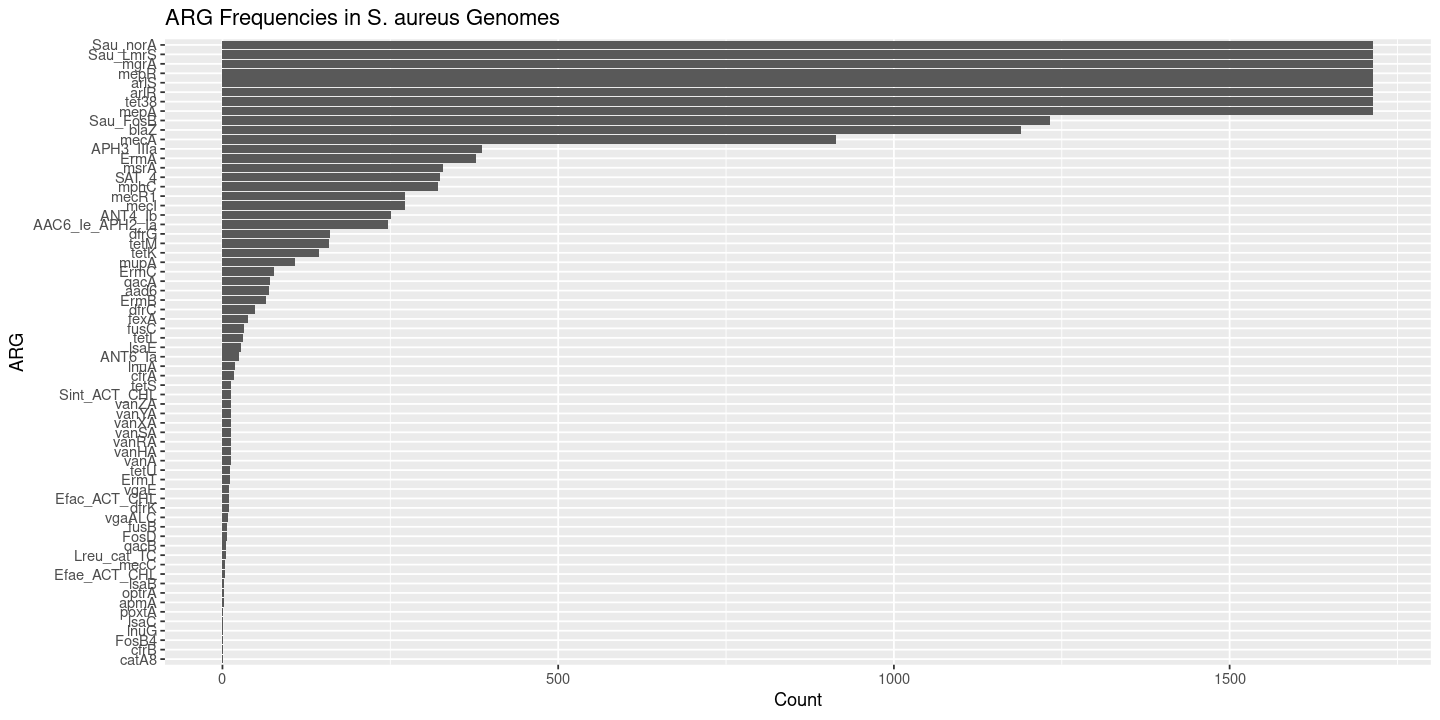

In [20]:
## Creating a bar plot of ARG frequencies in all S. aureus genomes - all ARGs 
# Calculate the sum of values in each column
arg_frequencies <- colSums(heatmap_abricate_df, na.rm = TRUE)

## Create a dataframe for plotting
arg_freq_df <- data.frame(ARG = names(arg_frequencies), Frequency = arg_frequencies)

## Sort the dataframe by Frequency in descending order
arg_freq_df_sorted <- arg_freq_df[order(-arg_freq_df$Frequency), ]

library(ggplot2)
## Create the bar plot with sorted data
ggplot(arg_freq_df_sorted, aes(x = Frequency, y = reorder(ARG, Frequency))) +
  geom_bar(stat = "identity") +
  labs(title = "ARG Frequencies in S. aureus Genomes", x = "Count", y = "ARG") 

In [27]:
## Creating a bar plot of ARG frequencies in all S. aureus genomes - only ARGs with at least 70 hits in all genomes 
ARGs_descript_list <- read.table("data/ARGs_descript_list.tsv", header = TRUE, sep ="\t") 
head(ARGs_descript_list)

,Identified_ARG,Count,Relative_Abundance,Pharmacological_Class,Resistance.Mechanism
,<chr>,<int>,<dbl>,<chr>,<chr>
1,AAC6_Ie_APH2_Ia,262,1.201,aminoglycoside,antibiotic inactivation
2,ANT4_Ib,265,1.215,aminoglycoside,antibiotic inactivation
3,ANT6_Ia,24,0.110,aminoglycoside,antibiotic inactivation
4,APH3_IIIa,421,1.930,aminoglycoside,antibiotic inactivation
5,Efae_ACT_CHL,4,0.018,phenicol,antibiotic inactivation
6,Efac_ACT_CHL,10,0.046,phenicol,antibiotic inactivation


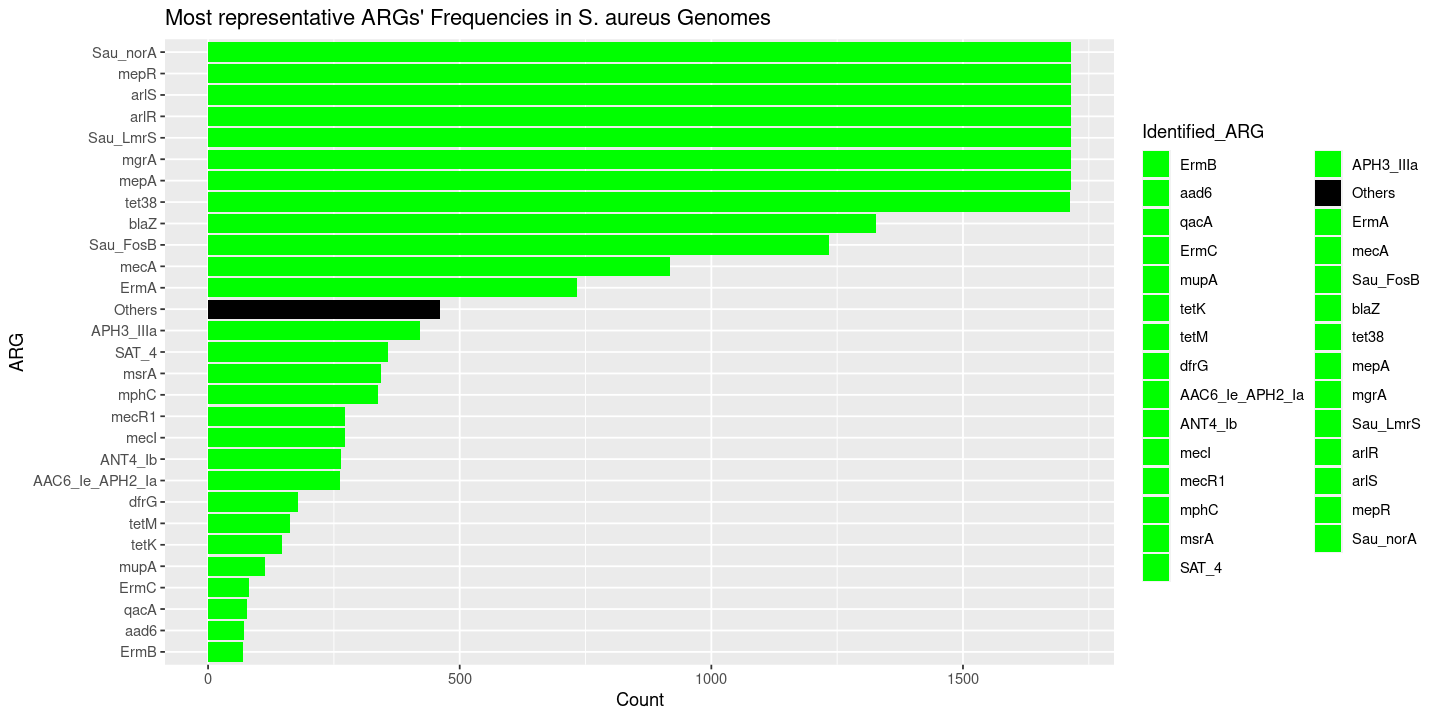

In [28]:
### Filter the data to include only counts greater than 70
filtered70_ARG_count <- subset(ARGs_descript_list, Count >= 70)

### Create a new category 'Others' for ARGs with Count 80 or less
others_ARG_count <- data.frame(Count = sum(ARGs_descript_list$Count[ARGs_descript_list$Count < 70]),
                          Identified_ARG = "Others")

### Create an additional row with 'Others' count values  - columns must be the same from filtered70_ARG_count
new_row <- data.frame(Identified_ARG = "Others", Count = 460, Relative_Abundance = "NA", Pharmacological_Class = "NA", Resistance.Mechanism = "NA")

### Combine the filtered data and 'Others' data
combined_data <- rbind(filtered70_ARG_count, new_row) 

### Create a custom color palette
my_colors <- c("Others" = "black")

unique_ARGs <- unique(filtered70_ARG_count$Identified_ARG)
for (ARG in unique_ARGs) {
    my_colors <- c(my_colors, setNames("green", ARG))
} 

### Reorder Identified_ARG by Count in ascending order
combined_data$Identified_ARG <- reorder(combined_data$Identified_ARG, combined_data$Count)

### Create the barplot with different fill colors
ggplot(combined_data, aes(x = Count, y = Identified_ARG, fill = Identified_ARG)) +
    geom_bar(stat = "identity") +
    labs(title = "Most representative ARGs' Frequencies in S. aureus Genomes", x = "Count", y = "ARG") +
    scale_fill_manual(values = my_colors)

`summarise()` has grouped output by 'Pharmacological_Class'. You can override using the `.groups` argument.


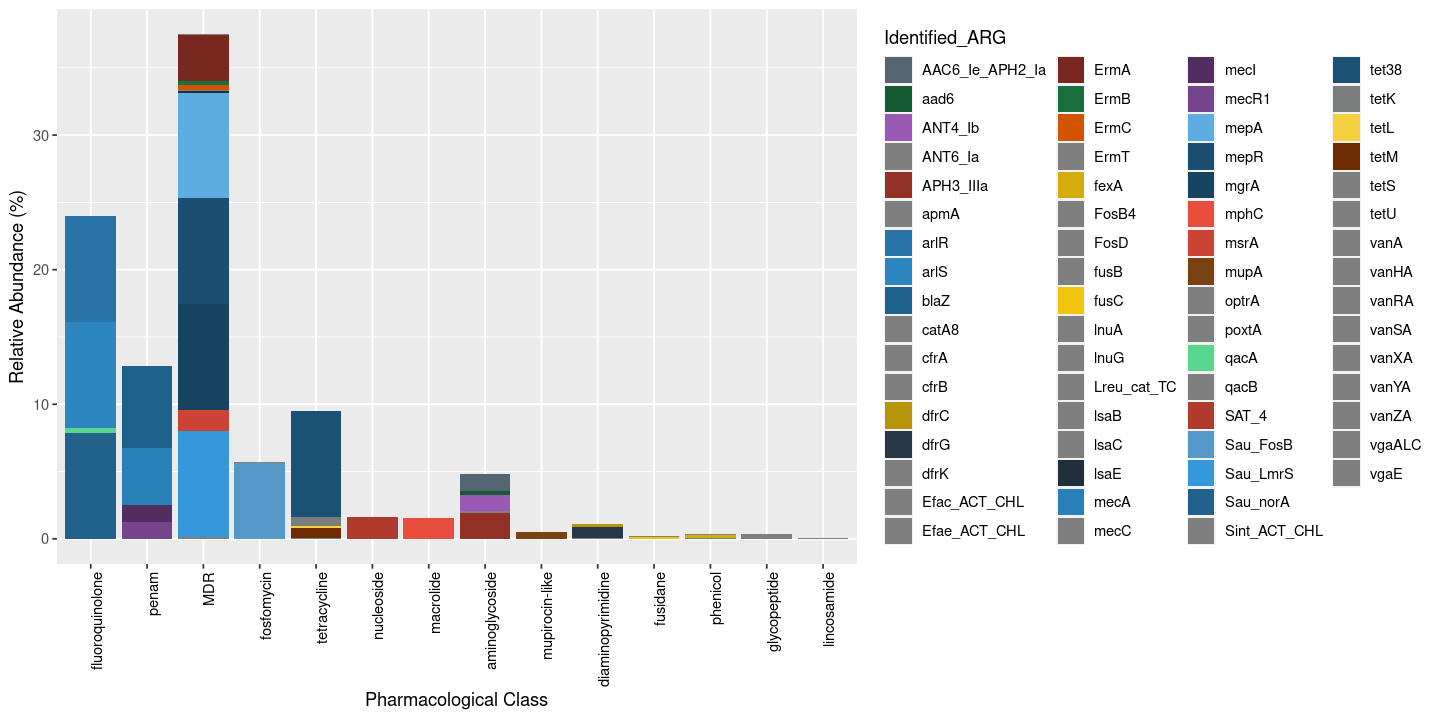

In [29]:
## Plotting ARGs relative abundances in S. aureus genomes
library(ggplot2)
library(dplyr)
library(tidyr)

### Create a new data frame with ARGs grouped by Pharmacological Class
stacked_df <- ARGs_descript_list %>% group_by(Pharmacological_Class, Identified_ARG) %>%
    summarize(Relative_Abundance = sum(Relative_Abundance))
stacked_df <- stacked_df %>% arrange(desc(Relative_Abundance))

gene_colors <- c("#1b4f72", "#21618c", "#2874a6", "#2e86c1", "#3498db", "#5dade2", "#154360", 
                  "#1a5276", "#1f618d", "#5499c7", "#2980b9", "#78281f", "#943126", "#b03a2e", 
                  "#cb4335", "#e74c3c", "#512e5f", "#76448a", "#9b59b6", "#566573", "#283747", 
                  "#6e2c00", "#7b7d7d", "#784212", "#d35400", "#58d68d", "#145a32", "#196f3d", 
                  "#b7950b", "#d4ac0d", "#f1c40f", "#f4d03f", "#212f3d")

args <- unique(stacked_df$Identified_ARG)
colors <- gene_colors[1:length(args)]
names(colors) <- args

ggplot(stacked_df, aes(x = reorder(Pharmacological_Class, -Relative_Abundance), y = Relative_Abundance, fill = Identified_ARG)) +
    geom_bar(stat = "identity", show.legend = TRUE) +
    labs(x = "Pharmacological Class",
         y = "Relative Abundance (%)") +
    theme(axis.text.x = element_text(angle = 90, hjust = 1, color = "black")) +
    scale_fill_manual(values = colors)    


In [31]:
ARGs_byCLASS <- read.table("data/ARGs_byCLASS.tsv", header = TRUE)
head(ARGs_byCLASS)

,Pharmacological_Class,ARGs_Count,Relative_Abundance
,<chr>,<int>,<dbl>
1,Aminoglycoside,1045,8.277
2,Phenicol,76,0.602
3,Fosfomycin,1241,9.830
4,Penam,2795,22.139
5,Nucleoside,358,2.836
6,Fluroquinolone,84,0.665


`summarise()` has grouped output by 'Resistance.Mechanism'. You can override using the `.groups` argument.


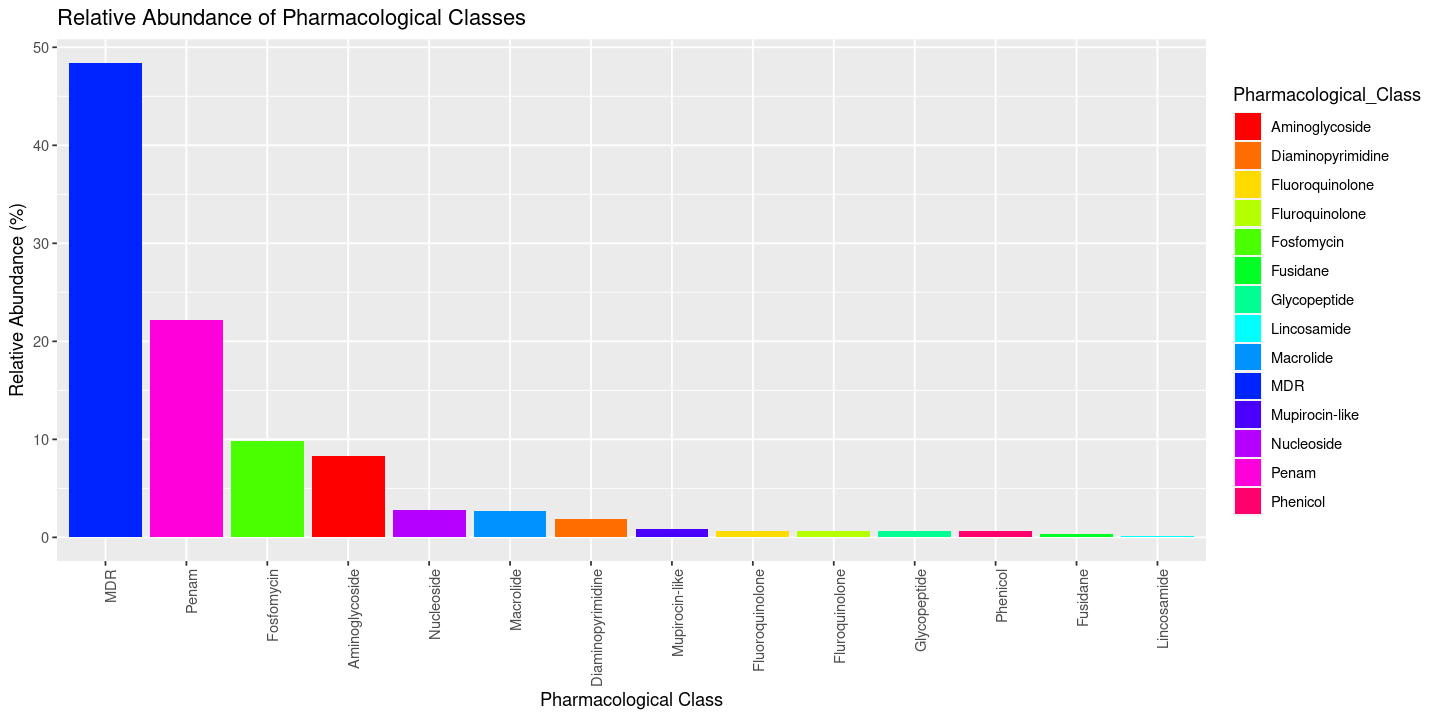

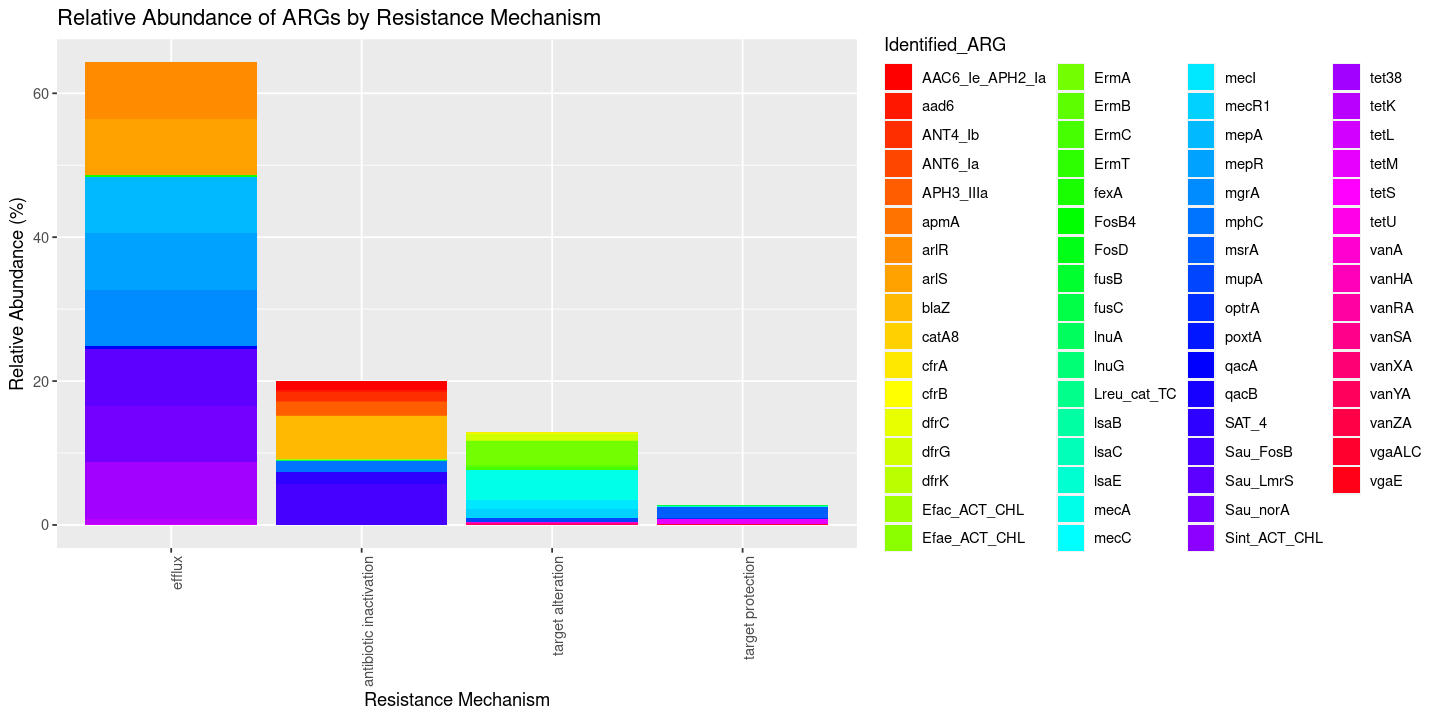

In [32]:
## Plotting relative abundances of pharmacological classes 


ggplot(ARGs_byCLASS, aes(x = reorder(Pharmacological_Class, - Relative_Abundance), y = Relative_Abundance, fill = Pharmacological_Class)) +
    geom_bar(stat = "identity") +
    labs(title = "Relative Abundance of Pharmacological Classes",
         x = "Pharmacological Class",
         y = "Relative Abundance (%)") +
    theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
    scale_fill_manual(values = rainbow(length(unique(ARGs_byCLASS$Pharmacological_Class))))
    
### Create a new data frame with ARGs grouped by Resistance Mechanism
stacked_df2 <- ARGs_descript_list %>% group_by(Resistance.Mechanism, Identified_ARG) %>%
    summarize(Relative_Abundance = sum(Relative_Abundance))

ggplot(stacked_df2, aes(x = reorder(Resistance.Mechanism, - Relative_Abundance), y = Relative_Abundance, fill = Identified_ARG)) +
    geom_bar(stat = "identity") +
    labs(title = "Relative Abundance of ARGs by Resistance Mechanism",
         x = "Resistance Mechanism",
         y = "Relative Abundance (%)") +
    theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
    scale_fill_manual(values = rainbow(length(unique(stacked_df$Identified_ARG))))
    

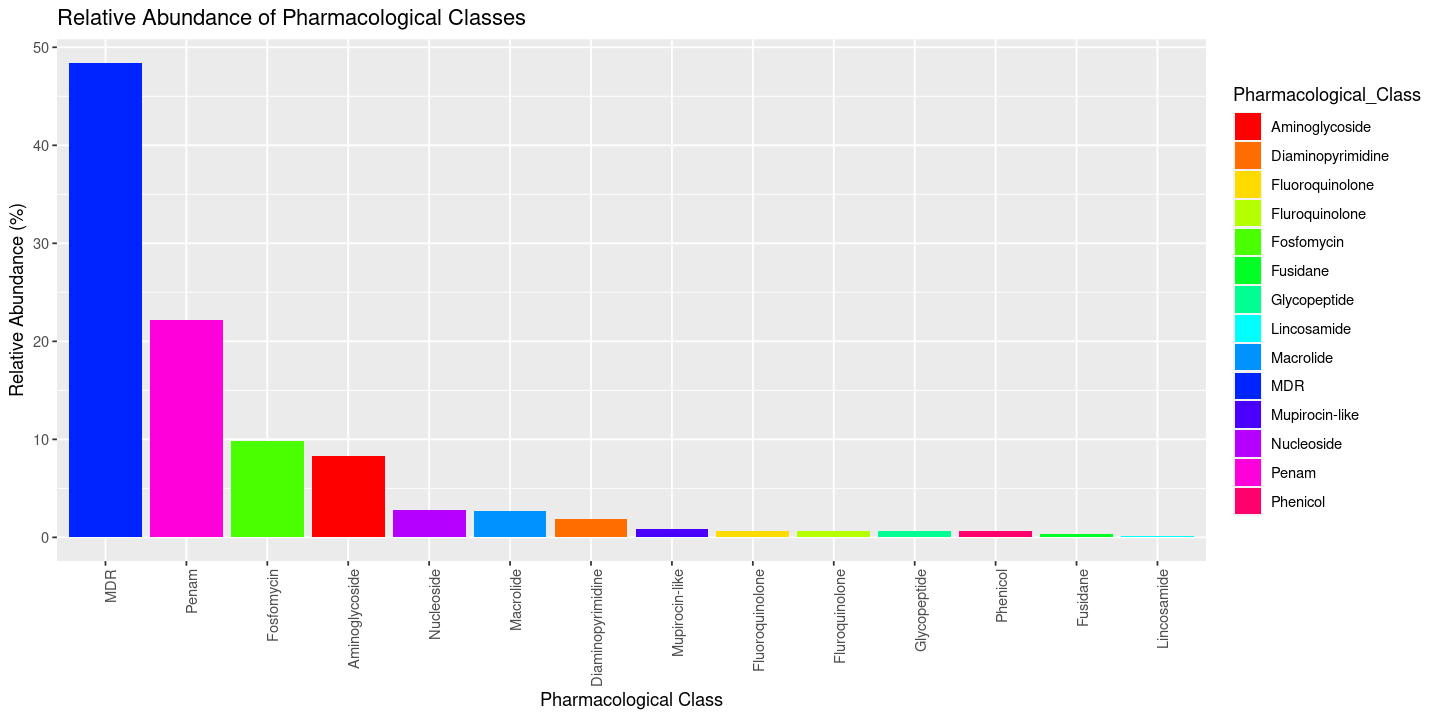

In [33]:
## Plotting relative abundances of pharmacological classes 
ggplot(ARGs_byCLASS, aes(x = reorder(Pharmacological_Class, - Relative_Abundance), y = Relative_Abundance, fill = Pharmacological_Class)) +
    geom_bar(stat = "identity") +
    labs(title = "Relative Abundance of Pharmacological Classes",
         x = "Pharmacological Class",
         y = "Relative Abundance (%)") +
    theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
    scale_fill_manual(values = rainbow(length(unique(ARGs_byCLASS$Pharmacological_Class))))

In [34]:
# ------------------------------------------------- VGs
# Use the same workflow for VGs and plasmids 
rstudioapi::writeRStudioPreference("data_viewer_max_columns", 1000L) # dealing with R issue that doesn't allow over 50 columns 

### Loop through all columns except the first two (FILE and NUM_FOUND), so that I replace the coverage values by the number of times that VG was found in that specific genome (basically creating a count matrix)
for (col in names(abricate_VGs_summary)[-c(1, 2)]) {
    # Replace ";" with "" (empty string) and calculate the difference in string lengths
    count_semicolons <- nchar(abricate_VGs_summary[[col]]) - nchar(gsub(";", "", abricate_VGs_summary[[col]])) + 1
   
    # Replace the original values with the count of semicolons
    abricate_VGs_summary[[col]] <- count_semicolons
}

### Remove '_genomic.abricate.txt' from the first column
abricate_VGs_summary$FILE <- gsub("_genomic-VGs.txt", "", abricate_VGs_summary$FILE)

### Checking if any ARG hasn't had any hit in the selected genomes
all_na_columns <- which(colSums(is.na(abricate_VGs_summary)) == nrow(abricate_VGs_summary))

### Print the names of columns with all NA values
if (length(all_na_columns) > 0) {
    cat("Columns with all NA values:", names(abricate_VGs_summary)[all_na_columns], "\n")
} else {
    cat("No columns with all NA values found.\n")
} # No columns with all NA values found.

### Mannually checked the highest value to scale my colors accordingly --> 6

library(pheatmap)

### Remove the first column (FILE) as it's not needed for the heatmap
heatmap_abricate_df <- abricate_VGs_summary[, -1]

### Replace NA with 0 in the entire dataframe
heatmap_abricate_df[is.na(heatmap_abricate_df)] <- 0

### Remove the first column (NUM_FOUND)
heatmap_abricate_df <- heatmap_abricate_df[, -1]

### Create a custom color palette from 0 to 6
color_palette <- colorRampPalette(c("white", "#013208"))(5)  

## Create the heatmap
pheatmap(
  heatmap_abricate_df,
  cluster_rows = TRUE,
  cluster_cols = TRUE,
  color = color_palette,
  scale = "row",
  border_color = "grey",
  main = "Heatmap of VGs Presence in Genomes",
  breaks = seq(0, 5, by = 1)  # Specify the breaks from 0 to 4
) # it worked but the plot is awful, I won't even save it 

## Creating a bar plot of VG frequencies in all S. aureus genomes - all VGs 
# Calculate the sum of values in each column
vg_frequencies <- colSums(heatmap_abricate_df, na.rm = TRUE)

## Create a dataframe for plotting
vg_freq_df <- data.frame(VG = names(vg_frequencies), Frequency = vg_frequencies)

## Sort the dataframe by Frequency in descending order
vg_freq_df_sorted <- vg_freq_df[order(-vg_freq_df$Frequency), ]

library(ggplot2)
## Create the bar plot with sorted data
ggplot(vg_freq_df_sorted, aes(x = Frequency, y = reorder(VG, Frequency))) +
  geom_bar(stat = "identity") +
  labs(title = "VG Frequencies in S. aureus Genomes", x = "Count", y = "VG") 

## Creating a bar plot of ARG frequencies in all S. aureus genomes - only ARGs with at least 70 hits in all genomes 

### Filter the data to include only counts greater than 1,000
filtered1k_VG_count <- subset(vg_freq_df_sorted, Frequency >= 1000)

### Create a new category 'Others' for ARGs with Count 80 or less
others_VG_count <- data.frame(Frequency = sum(vg_freq_df_sorted$Frequency[vg_freq_df_sorted$Frequency < 1000]),
                          VG = "Others")

### Create an additional row with 'Others' count values  - columns must be the same from filtered70_ARG_count
new_row <- data.frame(VG = "Others", Frequency = 7743)

### Combine the filtered data and 'Others' data
combined_data <- rbind(filtered1k_VG_count, new_row) 

### Create a custom color palette
my_colors <- c("Others" = "black")

unique_VGs <- unique(filtered1k_VG_count$VG)
for (VG in unique_VGs) {
    my_colors <- c(my_colors, setNames("green", VG))
} 

### Reorder Identified_ARG by Count in ascending order
combined_data$VG <- reorder(combined_data$VG, combined_data$Frequency)

### Create the barplot with different fill colors
ggplot(combined_data, aes(x = Frequency, y = VG, fill = VG)) +
    geom_bar(stat = "identity") +
    labs(title = "Most representative VGs' Frequencies in S. aureus Genomes", x = "Count", y = "VG") +
    scale_fill_manual(values = my_colors)

write.table(vg_freq_df_sorted, "abricate_VG-count.tsv", sep = "\t", quote = FALSE, row.names = FALSE, col.names = TRUE) # save it 

ERROR: Error: RStudio not running
